# MULTIPLE LINEAR REGRESSION

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In a previous analysis, I found that the features date_time, deg_C, relative_humidity, and absolute_humidity do not seem to have any linear relationship with the target variables, while the feaures sensor_# (except sensor_3) do somewhat.

In [3]:
df_train = df_train[['sensor_1', 'sensor_2', 'sensor_4', 'sensor_5',
                     'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]
df_train.head()

,sensor_1,sensor_2,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,1387.2,1087.8,1742.8,1293.4,2.5,12.0,167.7
1,1279.1,888.2,1449.9,1010.9,2.1,9.9,98.9
2,1331.9,929.6,1586.1,1117.0,2.2,9.2,127.1
3,1321.0,929.0,1536.5,1263.2,2.2,9.7,177.2
4,1272.0,852.7,1415.5,1132.2,1.5,6.4,121.8


### Remove Outliers

I will do this by looking at the plots and chosing the outliers visually

#### A) target_carbon_monoxide vs sensor_1

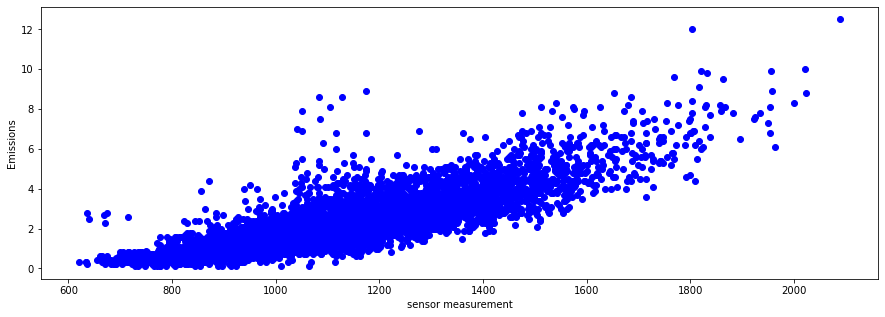

In [6]:
plt.scatter(df_train.sensor_1, df_train.target_carbon_monoxide,  color='blue')
plt.rcParams['figure.figsize']=[15,5]
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

In [7]:
#the loop below removes the outliers from the  plot of CO emissions vs sensor 1

for i in range(len(df_train)):
    
    if (df_train.loc[i,'sensor_1'] < 800) & (df_train.loc[i,'target_carbon_monoxide'] >2):
        
        df_train.drop(i, inplace=True)
                
#        df_train.loc[i,'target_carbon_monoxide']=0.1
        
    elif (800 < df_train.loc[i,'sensor_1'] < 1000) & (df_train.loc[i,'target_carbon_monoxide'] > 3):
        
        df_train.drop(i, inplace=True)
                
#        df_train.loc[i,'target_carbon_monoxide']=1.1
    
    elif (1000 < df_train.loc[i,'sensor_1'] < 1200) & (df_train.loc[i,'target_carbon_monoxide'] > 4):
        
        df_train.drop(i, inplace=True)
                
#        df_train.loc[i,'target_carbon_monoxide']=3.1
    
    elif (1200 < df_train.loc[i,'sensor_1'] < 1400) & (df_train.loc[i,'target_carbon_monoxide'] > 5):
        
        df_train.drop(i, inplace=True)
                
#        df_train.drop([i], inplace=True)

df_train.reset_index(drop=True, inplace=True)

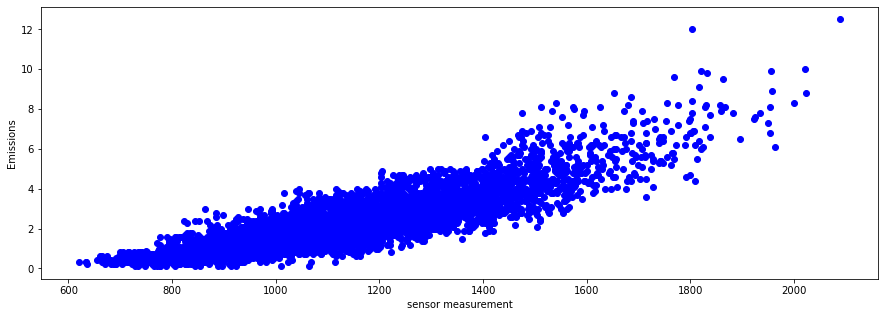

In [8]:
plt.scatter(df_train.sensor_1, df_train.target_carbon_monoxide,  color='blue')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### B) target_carbon_monoxide vs sensor_2

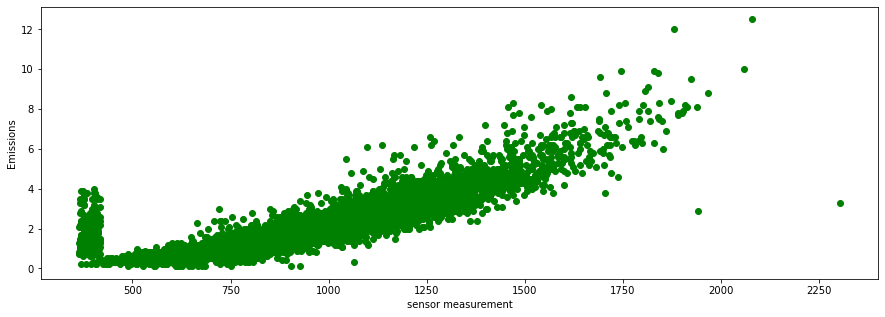

In [9]:
plt.scatter(df_train.sensor_2, df_train.target_carbon_monoxide,  color='green')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

In [10]:
for i in range(len(df_train)):
    
    if (df_train.loc[i,'sensor_2'] < 500) & (df_train.loc[i,'target_carbon_monoxide'] > 0.4):
        df_train.drop(i, inplace=True)
                
df_train.reset_index(drop=True, inplace=True)

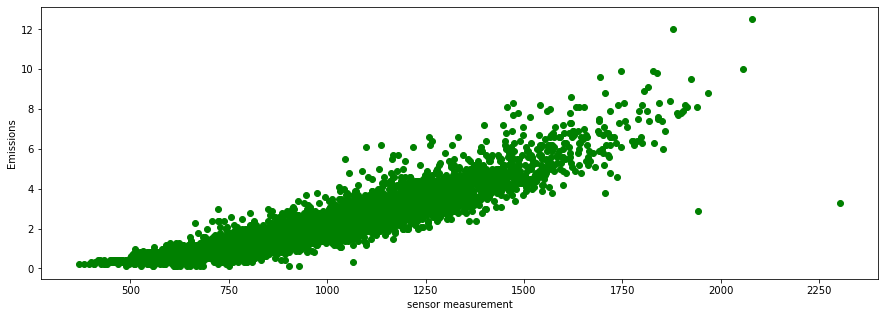

In [11]:
plt.scatter(df_train.sensor_2, df_train.target_carbon_monoxide,  color='green')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### C) target_carbon_monoxide vs sensor_4

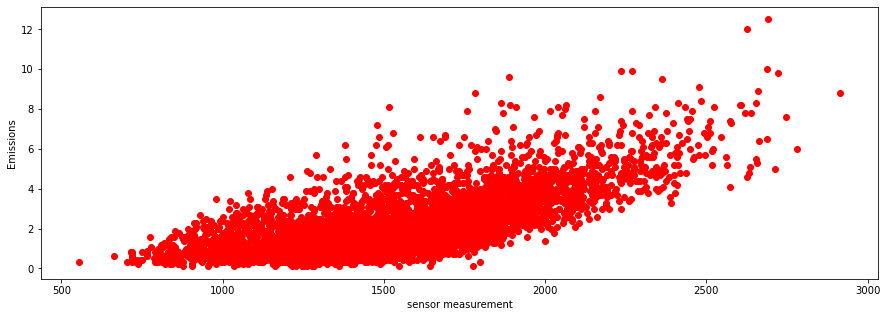

In [12]:
plt.scatter(df_train.sensor_4, df_train.target_carbon_monoxide,  color='red')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### D) target_carbon_monoxide vs sensor_5

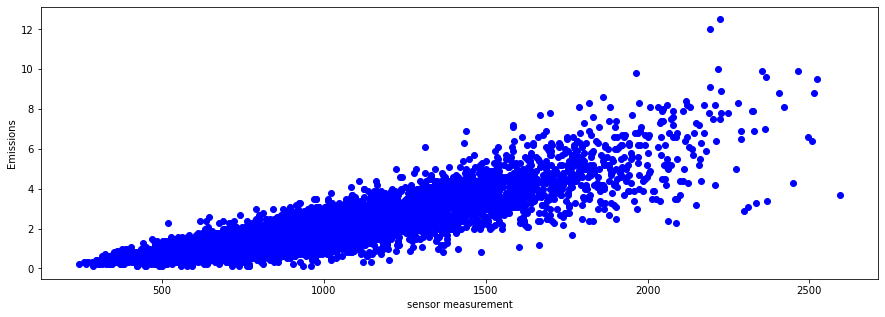

In [13]:
plt.scatter(df_train.sensor_5, df_train.target_carbon_monoxide,  color='blue')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### E) target_benzene vs sensor_1

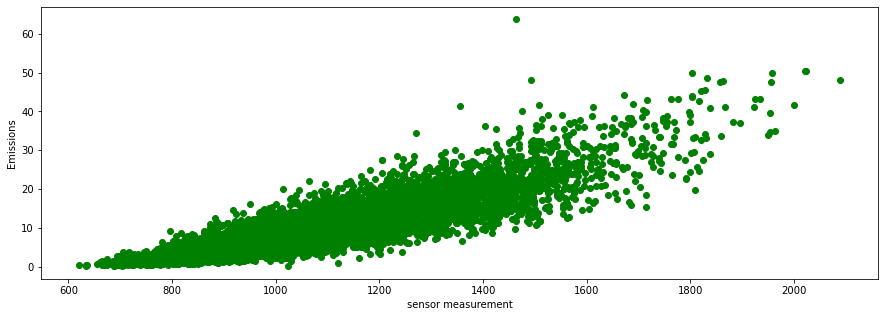

In [14]:
plt.scatter(df_train.sensor_1, df_train.target_benzene,  color='green')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

In [15]:
for i in range(len(df_train)):
    
    if (1400 < df_train.loc[i,'sensor_1'] < 1600) & (df_train.loc[i,'target_benzene'] > 50):
        df_train.drop(i, inplace=True)
                
df_train.reset_index(drop=True, inplace=True)

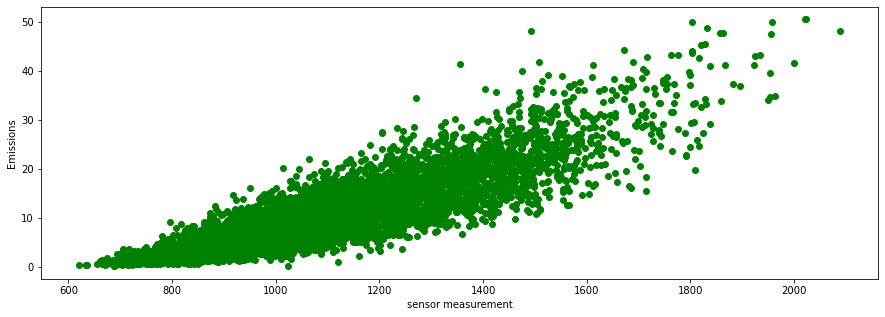

In [16]:
plt.scatter(df_train.sensor_1, df_train.target_benzene,  color='green')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### F) target_benzene vs sensor_2

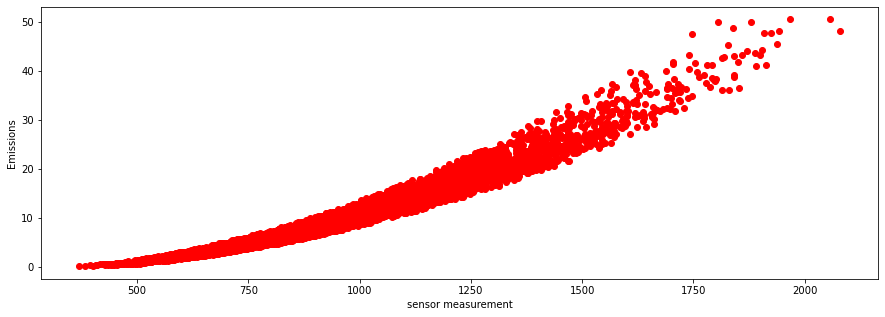

In [17]:
plt.scatter(df_train.sensor_2, df_train.target_benzene,  color='red')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### G) target_benzene vs sensor_4

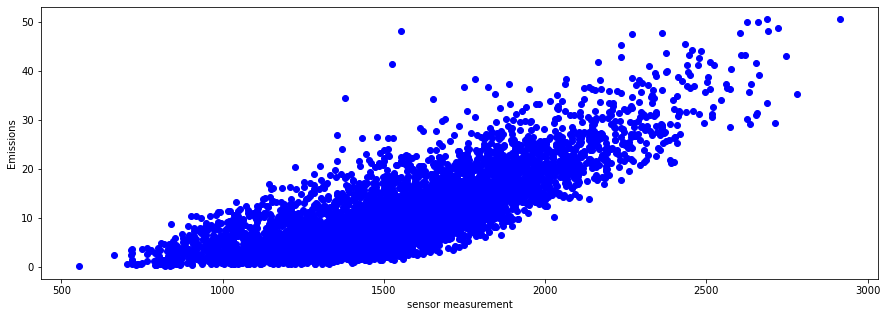

In [18]:
plt.scatter(df_train.sensor_4, df_train.target_benzene,  color='blue')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

In [19]:
for i in range(len(df_train)):
    
    if (1200 < df_train.loc[i,'sensor_4'] < 1700) & (df_train.loc[i,'target_benzene'] > 30):
        df_train.drop(i, inplace=True)
                
df_train.reset_index(drop=True, inplace=True)

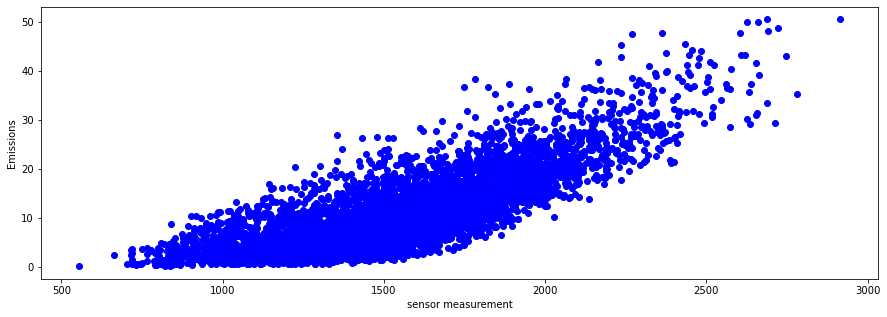

In [20]:
plt.scatter(df_train.sensor_4, df_train.target_benzene,  color='blue')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### H) target_benzene vs sensor_5

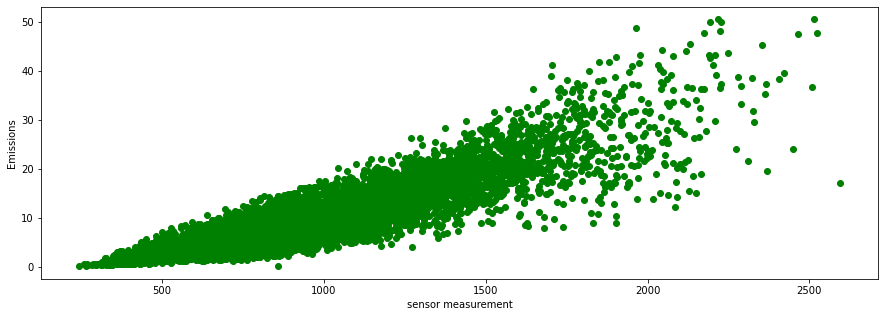

In [21]:
plt.scatter(df_train.sensor_5, df_train.target_benzene,  color='green')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### I) target_nitrogen_oxides vs sensor_1 

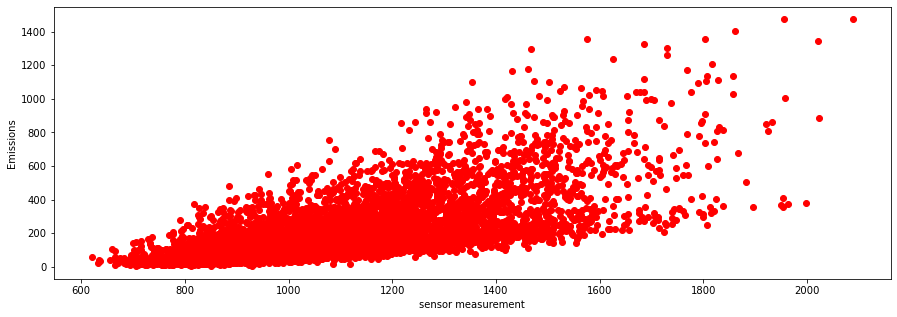

In [22]:
plt.scatter(df_train.sensor_1, df_train.target_nitrogen_oxides,  color='red')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### L) target_nitrogen_oxides vs sensor_2 

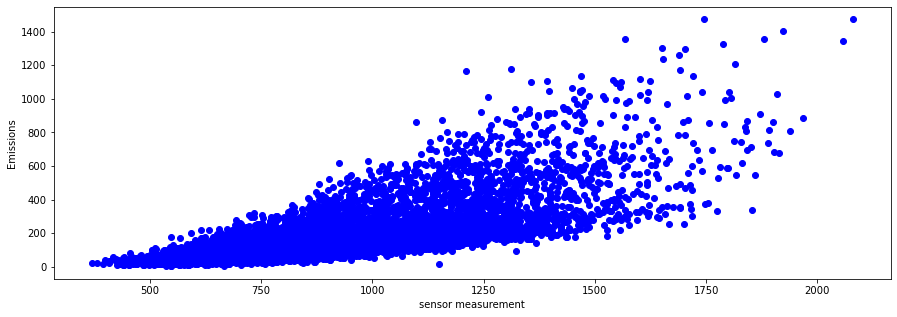

In [23]:
plt.scatter(df_train.sensor_2, df_train.target_nitrogen_oxides,  color='blue')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

In [24]:
for i in range(len(df_train)):
    
    if (800 < df_train.loc[i,'sensor_2'] < 1000) & (df_train.loc[i,'target_nitrogen_oxides'] > 580):
        df_train.drop(i, inplace=True)
    
    elif (df_train.loc[i,'sensor_2'] > 1100) & (df_train.loc[i,'target_nitrogen_oxides'] < 50):
        df_train.drop(i, inplace=True)
        
    elif (1100 < df_train.loc[i,'sensor_2'] >1250) & (df_train.loc[i,'target_nitrogen_oxides'] < 100):
        df_train.drop(i, inplace=True)
                
df_train.reset_index(drop=True, inplace=True)

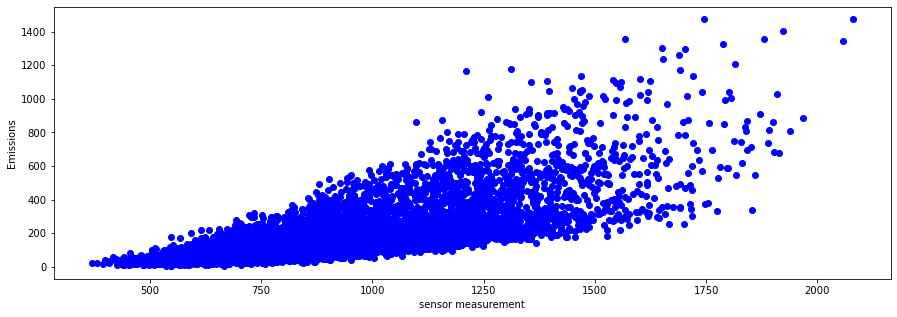

In [25]:
plt.scatter(df_train.sensor_2, df_train.target_nitrogen_oxides,  color='blue')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### M) target_nitrogen_oxides vs sensor_4

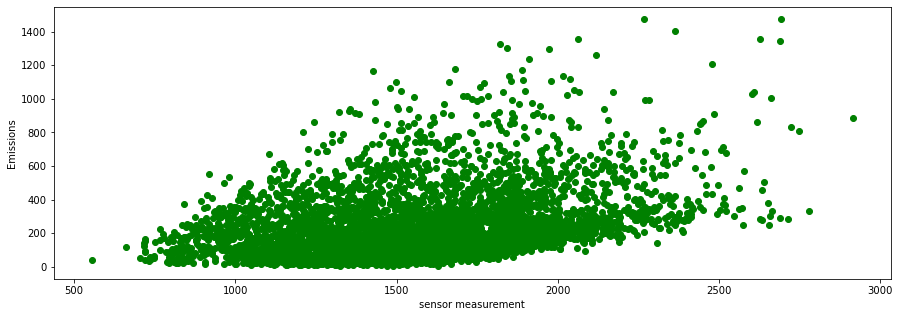

In [26]:
plt.scatter(df_train.sensor_4, df_train.target_nitrogen_oxides,  color='green')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

#### N) target_nitrogen_oxides vs sensor_5 

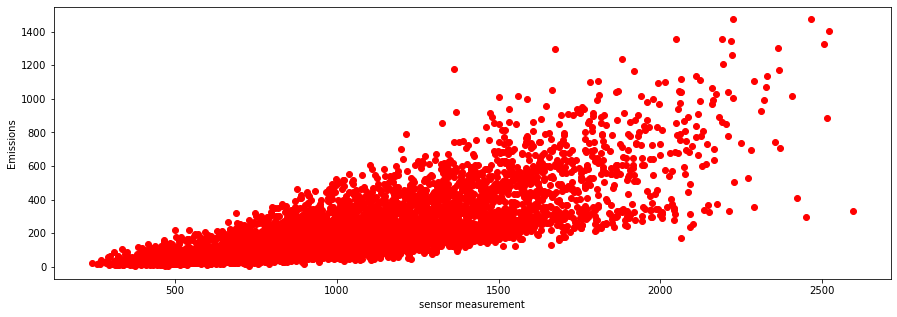

In [27]:
plt.scatter(df_train.sensor_5, df_train.target_nitrogen_oxides,  color='red')
plt.xlabel("sensor measurement")
plt.ylabel("Emissions")
plt.show()

### Train/test split

In [28]:
msk = np.random.rand(len(df_train)) < 0.8
train = df_train[msk]
test = df_train[~msk]

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In [29]:
from sklearn import linear_model

In [30]:
regr_CO = linear_model.LinearRegression()
regr_BE = linear_model.LinearRegression()
regr_NO = linear_model.LinearRegression()

In [31]:
x = np.asanyarray(train[['sensor_1', 'sensor_2', 'sensor_4', 'sensor_5']])
y_CO = np.asanyarray(train[['target_carbon_monoxide']])
y_BE = np.asanyarray(train[['target_benzene']])
y_NO = np.asanyarray(train[['target_nitrogen_oxides']])

In [32]:
regr_CO.fit (x, y_CO)
regr_BE.fit (x, y_BE)
regr_NO.fit (x, y_NO)

LinearRegression()

**Coefficient** and **Intercept** , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 4 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

```
- Solving the model parameters analytically using closed-form equations
- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)
```


<h2 id="prediction">Prediction</h2>


In [ ]:
tab_test=pd.read_csv('test.csv')
tab_test.head()

In [33]:
y_CO_hat= regr_CO.predict(test[['sensor_1', 'sensor_2', 'sensor_4', 'sensor_5']])

y_BE_hat= regr_BE.predict(test[['sensor_1', 'sensor_2', 'sensor_4', 'sensor_5']])

y_NO_hat= regr_NO.predict(test[['sensor_1', 'sensor_2', 'sensor_4', 'sensor_5']])


## Evaluation

I will use the RMSLE to evaluate the models. Specifically, I use the mean_squared_error from sklear and take the square root

In [34]:
from sklearn.metrics import mean_squared_log_error
import math

In [35]:
test_CO_y = np.asanyarray(test[['target_carbon_monoxide']])
test_BE_y = np.asanyarray(test[['target_benzene']])
test_NO_y = np.asanyarray(test[['target_nitrogen_oxides']])

In [36]:
min(y_CO_hat)

array([-0.70777735])

In [37]:
#In order to use the RMSLE, there should not be negative values: I will set all negative values to 0)
for i in range(len(y_CO_hat)):
    
    if y_CO_hat[i] < 0:
        
        y_CO_hat[i]= 0

min(y_CO_hat)

array([0.])

In [38]:
RMSLE_CO=math.sqrt(mean_squared_log_error(test_CO_y, y_CO_hat))

In [39]:
for i in range(len(y_BE_hat)):
    
    if y_BE_hat[i] < 0:
        
        y_BE_hat[i]= 0

min(y_BE_hat)

array([0.])

In [40]:
RMSLE_BE=math.sqrt(mean_squared_log_error(test_BE_y, y_BE_hat))

In [41]:
for i in range(len(y_NO_hat)):
    
    if y_NO_hat[i] < 0:
        
        y_NO_hat[i]= 0

min(y_NO_hat)

array([0.])

In [42]:
RMSLE_NO=math.sqrt(mean_squared_log_error(test_NO_y, y_NO_hat))

In [43]:
average_RMSLE=(RMSLE_CO+RMSLE_BE+RMSLE_NO)/3    #The final score on Kaggle is the mean of the RMSLE over all columns, 
                                                #in this case, 3.

In [234]:
print('The final score should be approximately {}'.format(average_RMSLE))

The final score should be approximately 0.5121182725416635


Using 100% of the training dataset for the training, I achieved a scrore of 0.38321 (I achieved 0.59050 with simple linear regression)

##### Now I will make the predicitons on the test file; I will retrain the models with all the data in the training set

## Training

In [45]:
regr_CO = linear_model.LinearRegression()
regr_BE = linear_model.LinearRegression()
regr_NO = linear_model.LinearRegression()

In [46]:
x = np.asanyarray(df_train[['sensor_1', 'sensor_2', 'sensor_4', 'sensor_5']])
y_CO = np.asanyarray(df_train[['target_carbon_monoxide']])
y_BE = np.asanyarray(df_train[['target_benzene']])
y_NO = np.asanyarray(df_train[['target_nitrogen_oxides']])

In [47]:
regr_CO.fit (x, y_CO)
regr_BE.fit (x, y_BE)
regr_NO.fit (x, y_NO)

LinearRegression()

## Prediction

In [48]:
tab_test=pd.read_csv('test.csv')
tab_test.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [49]:
y_CO_hat= regr_CO.predict(tab_test[['sensor_1', 'sensor_2', 'sensor_4', 'sensor_5']])

y_BE_hat= regr_BE.predict(tab_test[['sensor_1', 'sensor_2', 'sensor_4', 'sensor_5']])

y_NO_hat= regr_NO.predict(tab_test[['sensor_1', 'sensor_2', 'sensor_4', 'sensor_5']])


In [50]:
sample_submission=pd.read_csv('sample_submission.csv')
sample_submission.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,2.0,10.0,300.0
1,2011-01-01 01:00:00,2.0,10.0,300.0
2,2011-01-01 02:00:00,2.0,10.0,300.0
3,2011-01-01 03:00:00,2.0,10.0,300.0
4,2011-01-01 04:00:00,2.0,10.0,300.0


In [51]:
#here,I prepare the submission file

multi_linear_predictions_dict={}
iteration=0
for i in sample_submission.columns:
    if i == 'date_time':
        multi_linear_predictions_dict[i]=[x for x in tab_test['date_time']]
    
    elif i == 'target_carbon_monoxide':
        multi_linear_predictions_dict[i]=[x[0] for x in y_CO_hat]
        
    elif i == 'target_benzene':
        
        multi_linear_predictions_dict[i]=[x[0] for x in y_BE_hat]
    
    else:
        
        multi_linear_predictions_dict[i]=[x[0] for x in y_NO_hat]
    iteration+=1

multi_linear_predictions=pd.DataFrame(multi_linear_predictions_dict)
multi_linear_predictions.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.808018,5.383884,392.721041
1,2011-01-01 01:00:00,2.632045,9.303053,527.330897
2,2011-01-01 02:00:00,2.216281,8.378040,435.780663
3,2011-01-01 03:00:00,2.380330,9.371183,430.146240
4,2011-01-01 04:00:00,1.844072,7.080006,365.010470


In [52]:
multi_linear_predictions.to_csv('multi_linear_predictions.csv', index=False)